<a href="https://colab.research.google.com/github/GuilhermeVCCdaSilva/ProjetoBD/blob/main/ProjetoBigData_GuilhermeSilvaMarineFournieGon%C3%A7aloAlves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.estbarreiro.ips.pt/Content/images/logo-ESTB.png" align="right" alt="EsT Logo circle logo" style="height: 200px; width:300px;"/>

# Projeto Final Big Data 
* __Guilherme Silva__
* __Marine Emilie Fournier__
* __Gonçalo Alves__

In [1]:
# Installing required packages
!pip install pyspark
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Creating a SparkSession
- Para se trabalhar com dados no Spark, é essencial criar uma SparkSession, este passo é fundamental e o primeiro a ser realizado. Ela é responsável por gerenciar a configuração do Spark, criar RDDs (Resilient Distributed Datasets) e DataFrames, registar tabelas temporárias e gerenciar os recursos do cluster utilizados.

- A SparkSession é o ponto de partida para trabalhar com dados estruturados e relacionais no Spark SQL, o módulo do Spark que fornece suporte para essa funcionalidade. Ele permite que você execute consultas SQL, manipule DataFrames e extraia metadados. Ele também oferece acesso às bibliotecas de processamento de fluxo de dados (como o DataFrame API e o SQL) e às bibliotecas de aprendizado de máquina (como o MLlib) do Spark.

- A SparkSession (criada usando SparkSession.builder) é uma classe fundamental para trabalhar com dados no Spark, é através dela que é possível configurar e gerenciar a sessão, estabelecer conexões com o cluster, definir opções de configuração e gerenciar recursos como o número de núcleos para usar e a quantidade de memória. É a porta de entrada para trabalhar com dados estruturados e relacionais no Spark SQL.

- A configuração ".config("spark.memory.offHeap.enabled")" permite habilitar o uso de memória fora da heap (off-heap). Quando essa configuração é definida como "true", o Spark pode usar memória fora do heap do JVM para armazenar os dados e realizar operações. Isso permite que o Spark armazene e execute operações com mais dados, o que pode melhorar o desempenho quando a memória disponível dentro da heap não é suficiente.

- A configuração ".config("spark.memory.offHeap.size","10g")" permite definir a quantidade de memória fora do heap (off-heap) disponível para o Spark usar. Neste caso, o valor "10g" indica que o Spark pode usar até 10 gigabytes de memória fora do heap. Esse valor pode ser ajustado de acordo com o tamanho dos dados e as necessidades do seu aplicativo para garantir o melhor desempenho possível.

In [2]:
from pyspark.sql import SparkSession
import findspark

findspark.init()

spark = SparkSession.builder.appName("Pyspark Tutorial")\
                    .config("spark.memory.offHeap.enabled","true")\
                    .config("spark.memory.offHeap.size","10g")\
                    .getOrCreate()
spark                    

#Carregamento dos dados do DataSete criação do DataFrame:
Link para o DataSet: https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work

In [3]:
!curl https://raw.githubusercontent.com/GuilhermeVCCdaSilva/ProjetoBD/main/Absenteeism_at_work.csv >> Absenteeism_at_work.csv
df = spark.read.csv('Absenteeism_at_work.csv',header=True,sep=";")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 45232  100 45232    0     0   189k      0 --:--:-- --:--:-- --:--:--  189k


#"Data Visualization" e Análise

- Primeiramente vamos tamanho e o tipo de dados do nosso Dataset.

- Este passo era mais simples ser executado através do método shape, mas como o não é suportado pelo PySpark DataFrame, no entanto, podemos contar o número de linhas e colunas usando o método count() e verificar o esquema (colunas e tipos de dados) do DataFrame usando o método printSchema().

In [4]:
print("Numero de Linhas:", df.count())
print("Numero de Colunas:", len(df.columns))
print("Esquema do DataFrame: ")
df.printSchema()

Numero de Linhas: 20006
Numero de Colunas: 21
Esquema do DataFrame: 
root
 |-- ID: string (nullable = true)
 |-- Reason for absence: string (nullable = true)
 |-- Month of absence: string (nullable = true)
 |-- Day of the week: string (nullable = true)
 |-- Seasons: string (nullable = true)
 |-- Transportation expense: string (nullable = true)
 |-- Distance from Residence to Work: string (nullable = true)
 |-- Service time: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Work load Average/day : string (nullable = true)
 |-- Hit target: string (nullable = true)
 |-- Disciplinary failure: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Son: string (nullable = true)
 |-- Social drinker: string (nullable = true)
 |-- Social smoker: string (nullable = true)
 |-- Pet: string (nullable = true)
 |-- Weight: string (nullable = true)
 |-- Height: string (nullable = true)
 |-- Body mass index: string (nullable = true)
 |-- Absenteeism time in hours: string 

Resumindo: 
- O DataFrame tem 8891 linhas e 21 colunas. O esquema do DataFrame mostra que todas as colunas são do tipo string e são nullable (podem conter valores nulos). Algumas das colunas incluem "ID", "Reason for absence", "Month of absence", "Age" e "Absenteeism time in hours".

In [5]:
df.show(10)

+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
| ID|Reason for absence|Month of absence|Day of the week|Seasons|Transportation expense|Distance from Residence to Work|Service time|Age|Work load Average/day |Hit target|Disciplinary failure|Education|Son|Social drinker|Social smoker|Pet|Weight|Height|Body mass index|Absenteeism time in hours|
+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
| 11|                26|               7|              3|      1|                   289|                        

##Descrição das variáveis do DataFrame:

- ID: Identificador único para cada registo.
- Razão para a ausência: Razão para a ausência do funcionário no trabalho.
- Mês da ausência: O mês em que o funcionário estava ausente.
- Dia da semana: O dia da semana em que o funcionário estava ausente.
- Estações: A estação do ano em que o funcionário estava ausente.
- Despesas de transporte: As despesas de transporte incorridas pelo funcionário ao viajar para o trabalho.
- Distância da residência para o trabalho: A distância entre a residência do funcionário e o local de trabalho.
- Tempo de serviço: O período de tempo em que o funcionário está a trabalhar na empresa.
- Idade: A idade do funcionário.
- Carga de trabalho média/dia: A carga de trabalho média do funcionário por dia.
- Alvo atingido: Se o funcionário atingiu ou não o alvo
- Falha disciplinar: Se o funcionário cometeu alguma falha disciplinar ou não.
- Educação: O nível de educação do funcionário.
- Filhos: O número de filhos que o funcionário tem.
- Bebedor social: Se o funcionário bebe socialmente ou não.
- Fumador social: Se o funcionário fuma socialmente ou não.
- Animal de estimação: Se o funcionário tem algum animal de estimação ou não.
- Peso: O peso do funcionário.
- Altura: A altura do funcionário.
- Índice de massa corporal: O índice de massa corporal do funcionário.
- Tempo de ausência em horas: O número de horas que o funcionário ficou ausente.

In [6]:
df = df.drop("id")

Removeu-se a coluna ID pois não é relevante para os algoritmos de aprendizado de máquina.

In [7]:
df.show(10)

+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
|Reason for absence|Month of absence|Day of the week|Seasons|Transportation expense|Distance from Residence to Work|Service time|Age|Work load Average/day |Hit target|Disciplinary failure|Education|Son|Social drinker|Social smoker|Pet|Weight|Height|Body mass index|Absenteeism time in hours|
+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
|                26|               7|              3|      1|                   289|                             36|        

#COLOCAR AQUI ALGUMAS PERGUNTAS AO DATAFRAME: 3 PELO MENOS

In [8]:
print("yhyh")

yhyh


#Pré tratamento e Análise exploratória de dados

- Verificar o número de valores ausentes em cada coluna.

In [9]:
# criar uma lista para armazenar o número de valores ausentes em cada coluna.
missing_values = []

# iterar através das colunas no conjunto de dados.
for col in df.columns:
    missing_values.append((col, df.filter(df[col].isNull()).count()))

# print os valores inexistentes
for col, val in missing_values:
    if val == 0:
        print("{} : Nunhum missing values encontrado".format(col))
    else:
        print("{} : {} missing values".format(col, val))

Reason for absence : Nunhum missing values encontrado
Month of absence : Nunhum missing values encontrado
Day of the week : Nunhum missing values encontrado
Seasons : Nunhum missing values encontrado
Transportation expense : Nunhum missing values encontrado
Distance from Residence to Work : Nunhum missing values encontrado
Service time : Nunhum missing values encontrado
Age : Nunhum missing values encontrado
Work load Average/day  : Nunhum missing values encontrado
Hit target : Nunhum missing values encontrado
Disciplinary failure : Nunhum missing values encontrado
Education : Nunhum missing values encontrado
Son : Nunhum missing values encontrado
Social drinker : Nunhum missing values encontrado
Social smoker : Nunhum missing values encontrado
Pet : Nunhum missing values encontrado
Weight : Nunhum missing values encontrado
Height : Nunhum missing values encontrado
Body mass index : Nunhum missing values encontrado
Absenteeism time in hours : Nunhum missing values encontrado


- Verifiquar os tipos de dados das colunas.

In [10]:
df.dtypes

[('Reason for absence', 'string'),
 ('Month of absence', 'string'),
 ('Day of the week', 'string'),
 ('Seasons', 'string'),
 ('Transportation expense', 'string'),
 ('Distance from Residence to Work', 'string'),
 ('Service time', 'string'),
 ('Age', 'string'),
 ('Work load Average/day ', 'string'),
 ('Hit target', 'string'),
 ('Disciplinary failure', 'string'),
 ('Education', 'string'),
 ('Son', 'string'),
 ('Social drinker', 'string'),
 ('Social smoker', 'string'),
 ('Pet', 'string'),
 ('Weight', 'string'),
 ('Height', 'string'),
 ('Body mass index', 'string'),
 ('Absenteeism time in hours', 'string')]

- Converter tipo de dados string para double

In [11]:
from pyspark.sql.functions import col
for column in df.columns:
    df = df.withColumn(column, col(column).cast("double"))

In [12]:
df.dtypes

[('Reason for absence', 'double'),
 ('Month of absence', 'double'),
 ('Day of the week', 'double'),
 ('Seasons', 'double'),
 ('Transportation expense', 'double'),
 ('Distance from Residence to Work', 'double'),
 ('Service time', 'double'),
 ('Age', 'double'),
 ('Work load Average/day ', 'double'),
 ('Hit target', 'double'),
 ('Disciplinary failure', 'double'),
 ('Education', 'double'),
 ('Son', 'double'),
 ('Social drinker', 'double'),
 ('Social smoker', 'double'),
 ('Pet', 'double'),
 ('Weight', 'double'),
 ('Height', 'double'),
 ('Body mass index', 'double'),
 ('Absenteeism time in hours', 'double')]

- Mapear os valores inteiros da coluna "Reason for absence" para descrições de texto correspondentes.

In [13]:
from pyspark.sql.functions import when
from pyspark.sql.functions import array
from pyspark.sql.functions import udf
# Criar o dicionario mapping 
mapping_dict = {
    0: "CID - Patient follow-up",
    1: "CID - Medical consultation",
    2: "CID - Blood donation",
    3: "CID - Laboratory examination",
    4: "CID - Unjustified absence",
    5: "CID - Physiotherapy",
    6: "CID - Dental consultation",
    7: "Certain infectious and parasitic diseases",
    8: "Neoplasms",
    9: "Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism",
    10: "Endocrine, nutritional and metabolic diseases",
    11: "Mental and behavioural disorders",
    12: "Diseases of the nervous system",
    13: "Diseases of the eye and adnexa",
    14: "Diseases of the ear and mastoid process",
    15: "Diseases of the circulatory system",
    16: "Diseases of the respiratory system",
    17: "Diseases of the digestive system",
    18: "Diseases of the skin and subcutaneous tissue",
    19: "Diseases of the musculoskeletal system and connective tissue",
    20: "Diseases of the genitourinary system",
    21: "Pregnancy, childbirth and the puerperium",
    22: "Certain conditions originating in the perinatal period",
    23: "Congenital malformations, deformations and chromosomal abnormalities",
    24: "Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified",
    25: "Injury, poisoning and certain other consequences of external causes",
    26: "External causes of morbidity and mortality",
    27: "Factors influencing health status and contact with health services"
}

# Criar a função definida pelo usuário.
map_reason = udf(lambda x: mapping_dict.get(x))

# Aplicar a função definida pelo usuário ao dataframe
df = df.withColumn("Reason for absence", map_reason(col("Reason for absence")))

- Resultado:

In [14]:
# Seleciona a coluna específica "Reason for absence" e mostra o conteúdo da mesma.
df.select("Reason for absence").show()

+--------------------+
|  Reason for absence|
+--------------------+
|External causes o...|
|CID - Patient fol...|
|Congenital malfor...|
|Certain infectiou...|
|Congenital malfor...|
|Congenital malfor...|
|Certain condition...|
|Congenital malfor...|
|Diseases of the m...|
|Certain condition...|
|CID - Medical con...|
|CID - Medical con...|
|Mental and behavi...|
|Mental and behavi...|
|Congenital malfor...|
|Diseases of the e...|
|Congenital malfor...|
|Pregnancy, childb...|
|Mental and behavi...|
|Congenital malfor...|
+--------------------+
only showing top 20 rows



In [15]:
df.show(10)

+--------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+----+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
|  Reason for absence|Month of absence|Day of the week|Seasons|Transportation expense|Distance from Residence to Work|Service time| Age|Work load Average/day |Hit target|Disciplinary failure|Education|Son|Social drinker|Social smoker|Pet|Weight|Height|Body mass index|Absenteeism time in hours|
+--------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+----+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
|External causes o...|             7.0|            3.0|    1.0|                 289.0|                           36

In [16]:
df.dtypes

[('Reason for absence', 'string'),
 ('Month of absence', 'double'),
 ('Day of the week', 'double'),
 ('Seasons', 'double'),
 ('Transportation expense', 'double'),
 ('Distance from Residence to Work', 'double'),
 ('Service time', 'double'),
 ('Age', 'double'),
 ('Work load Average/day ', 'double'),
 ('Hit target', 'double'),
 ('Disciplinary failure', 'double'),
 ('Education', 'double'),
 ('Son', 'double'),
 ('Social drinker', 'double'),
 ('Social smoker', 'double'),
 ('Pet', 'double'),
 ('Weight', 'double'),
 ('Height', 'double'),
 ('Body mass index', 'double'),
 ('Absenteeism time in hours', 'double')]

- Verifica as estatísticas das colunas numéricas.


In [17]:
df.describe().toPandas()

,summary,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,count,16956,19980,19980,19980,19980,19980,19980,19980,19980,...,19980,19980,19980,19980,19980,19980,19980,19980,19980,19980
1,mean,None,6.324324324324325,3.9148648648648647,2.5445945945945945,221.32972972972973,29.63108108108108,12.554054054054054,36.45,271.49023513513544,...,0.05405405405405406,1.2918918918918918,1.018918918918919,0.5675675675675675,0.07297297297297298,0.745945945945946,79.03513513513514,172.11486486486487,26.677027027027027,6.924324324324324
2,stddev,None,3.434050269759746,1.4207493487256102,1.1111073748243814,66.90864437465216,14.8271312445943,4.382019315227165,6.474555456691984,39.03269345367196,...,0.22612999047517499,0.6727998342167526,1.0977740184654727,0.495425986846727,0.2600986430945315,1.3174002435299685,12.874824889235656,6.031066382203778,4.2826628435300735,13.322321020308573
3,min,CID - Blood donation,0.0,2.0,1.0,118.0,5.0,1.0,27.0,205.917,...,0.0,1.0,0.0,0.0,0.0,0.0,56.0,163.0,19.0,0.0
4,max,"Symptoms, signs and abnormal clinical and labo...",12.0,6.0,4.0,388.0,52.0,29.0,58.0,378.884,...,1.0,4.0,4.0,1.0,1.0,8.0,108.0,196.0,38.0,120.0


- Verifica a correlação entre as colunas.

In [18]:
corr = df.stat.corr("Month of absence", "Transportation expense")
print(corr)

0.14410171151361892


- Verifica o número de valores únicos em cada coluna.

In [19]:
for col in df.columns:
    print("Unique values in column '{}':".format(col), df.select(col).distinct().count())

Unique values in column 'Reason for absence': 28
Unique values in column 'Month of absence': 14
Unique values in column 'Day of the week': 6
Unique values in column 'Seasons': 5
Unique values in column 'Transportation expense': 25
Unique values in column 'Distance from Residence to Work': 26
Unique values in column 'Service time': 19
Unique values in column 'Age': 23
Unique values in column 'Work load Average/day ': 39
Unique values in column 'Hit target': 14
Unique values in column 'Disciplinary failure': 3
Unique values in column 'Education': 5
Unique values in column 'Son': 6
Unique values in column 'Social drinker': 3
Unique values in column 'Social smoker': 3
Unique values in column 'Pet': 7
Unique values in column 'Weight': 27
Unique values in column 'Height': 15
Unique values in column 'Body mass index': 18
Unique values in column 'Absenteeism time in hours': 20


- Verifica a distribuição de cada coluna.

In [20]:
for col in df.columns:
    df.select(col).groupBy(col).count().show()

+--------------------+-----+
|  Reason for absence|count|
+--------------------+-----+
|Congenital malfor...| 4023|
|Symptoms, signs a...|   81|
|CID - Dental cons...|  216|
|CID - Unjustified...|   54|
|                null| 3050|
|Diseases of the e...| 1485|
|CID - Laboratory ...|   27|
|CID - Blood donation|   27|
|Injury, poisoning...|  837|
|           Neoplasms|  162|
|CID - Patient fol...| 1161|
|Pregnancy, childb...|  162|
|Endocrine, nutrit...|  675|
|Diseases of the b...|  108|
|Diseases of the c...|   54|
| CID - Physiotherapy|   81|
|Diseases of the m...| 1080|
|Diseases of the e...|  513|
|Certain condition...| 1026|
|Diseases of the s...|  567|
+--------------------+-----+
only showing top 20 rows

+----------------+-----+
|Month of absence|count|
+----------------+-----+
|             8.0| 1458|
|             0.0|   81|
|             7.0| 1809|
|            null|   26|
|             1.0| 1350|
|             4.0| 1431|
|            11.0| 1701|
|             3.0| 2349|
|  

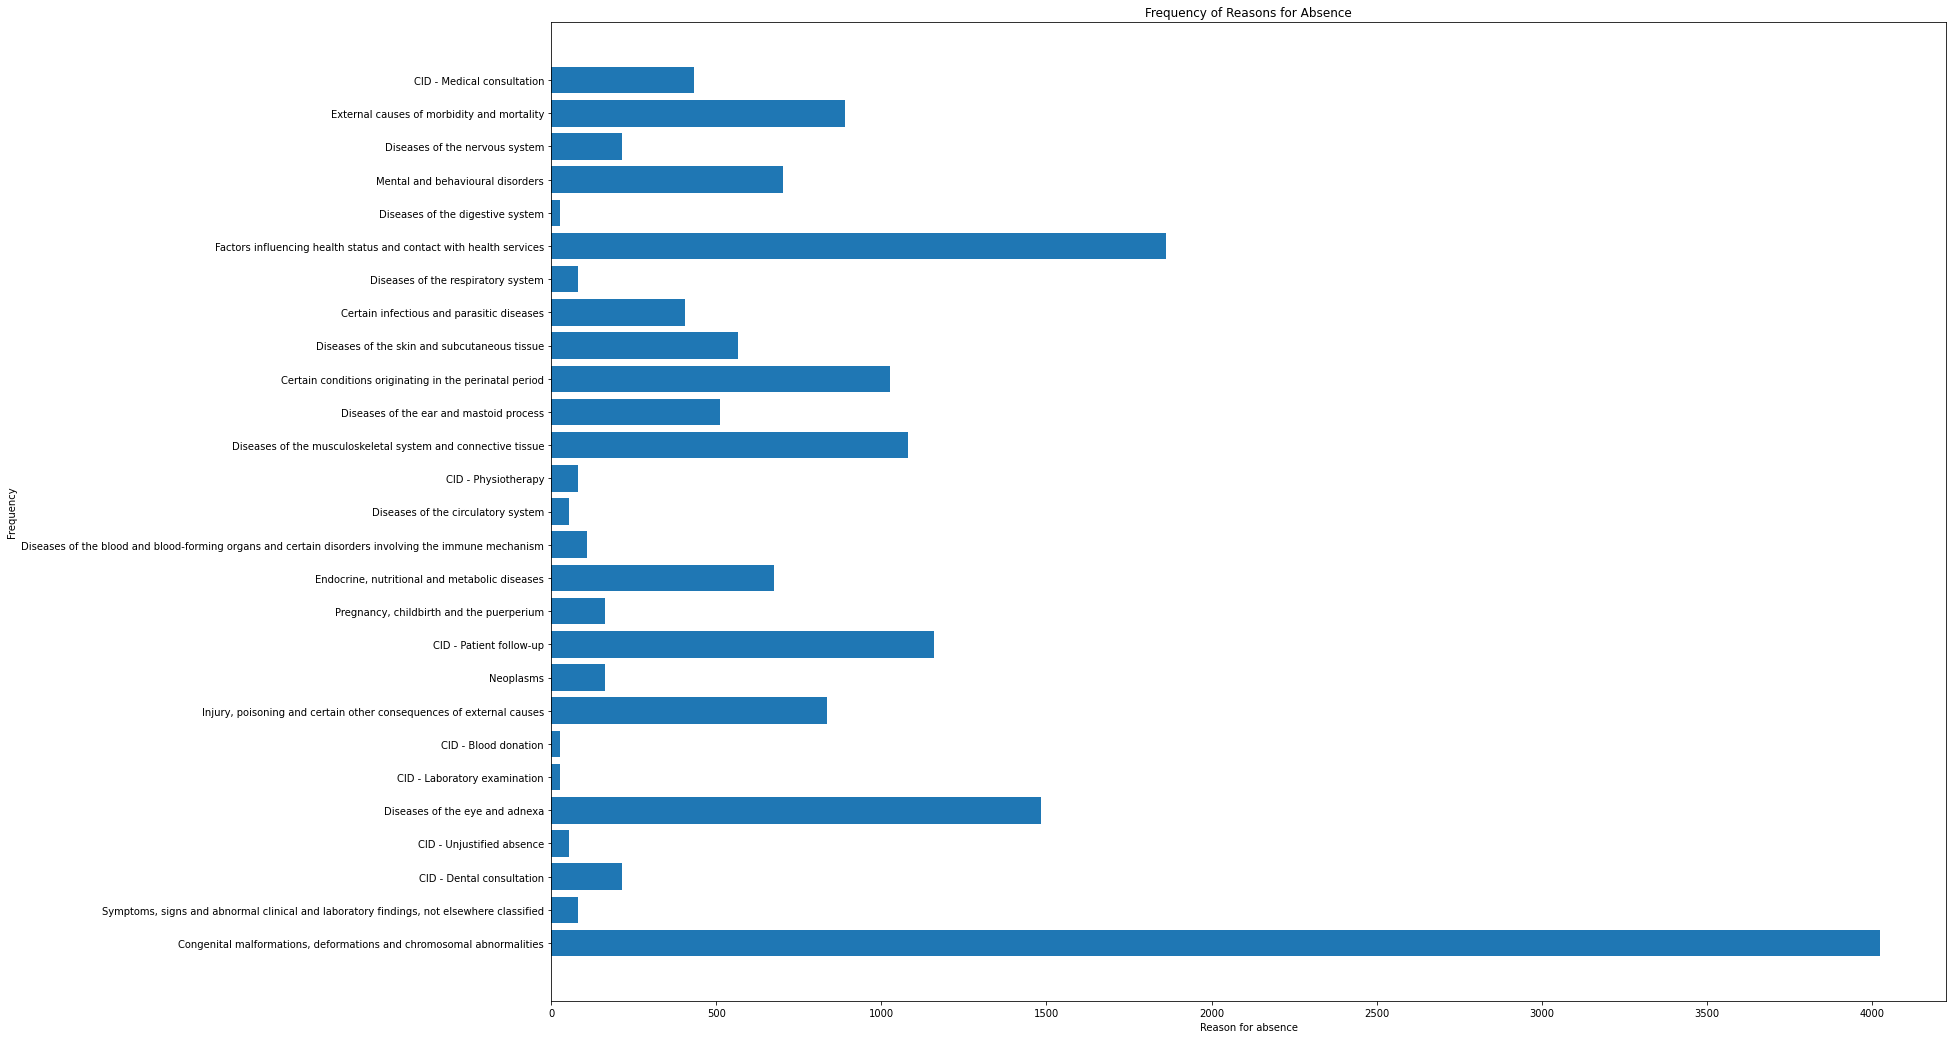

In [21]:
import matplotlib.pyplot as plt

# Count the frequency of each category in "Reason for absence" column
df = df.dropna(subset = ["Reason for absence"])
reason_counts = df.groupBy("Reason for absence").count().toPandas()

# Plot the bar chart
plt.figure(figsize=(25, 18))
plt.barh(reason_counts["Reason for absence"], reason_counts["count"])
plt.xlabel("Reason for absence")
plt.ylabel("Frequency")
plt.title("Frequency of Reasons for Absence")

plt.show()

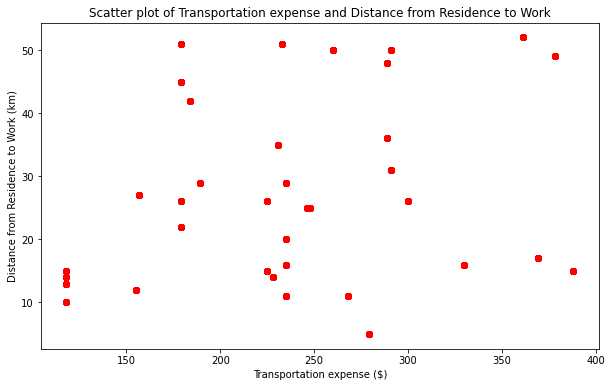

In [22]:
import matplotlib.pyplot as plt

# Extract the columns "Transportation expense" and "Distance from Residence to Work"
x = df.select("Transportation expense").toPandas()
y = df.select("Distance from Residence to Work").toPandas()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red')
plt.xlabel("Transportation expense ($)")
plt.ylabel("Distance from Residence to Work (km)")
plt.title("Scatter plot of Transportation expense and Distance from Residence to Work")
plt.show()

- Mostrar a distribuição de idade dos funcionários que estão faltando:

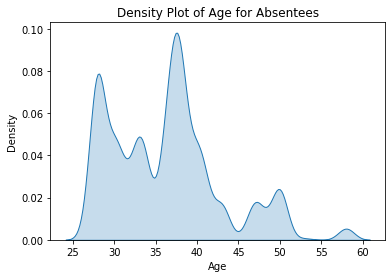

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the 'Age' column
age_data = df.select("Age").toPandas()

# Reset the index
age_data.reset_index(drop=True, inplace=True)

# Create a density plot
sns.kdeplot(age_data['Age'], shade=True)

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Density Plot of Age for Absentees")

# Show the plot
plt.show()

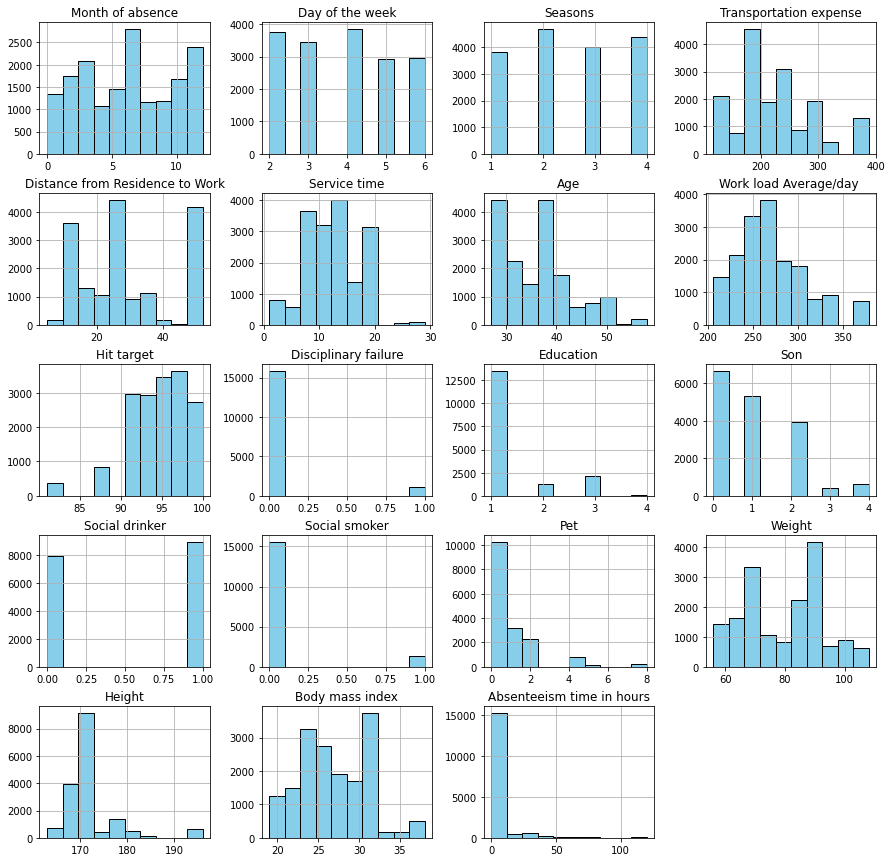

In [24]:
import matplotlib.pyplot as plt

# Get a list of all numerical columns
num_cols = [c for c in df.columns if df.select(c).dtypes[0][1] == 'double']

df_num = df.select(num_cols)

# Plot a histogram for each numerical column
df_num.toPandas().hist(figsize=[15,15],bins=10, color='skyblue', histtype='bar', ec='black')
plt.show()

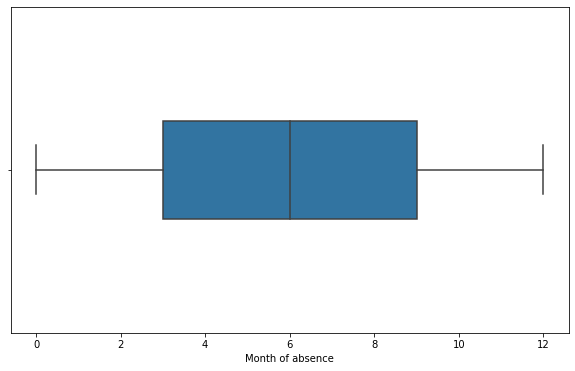

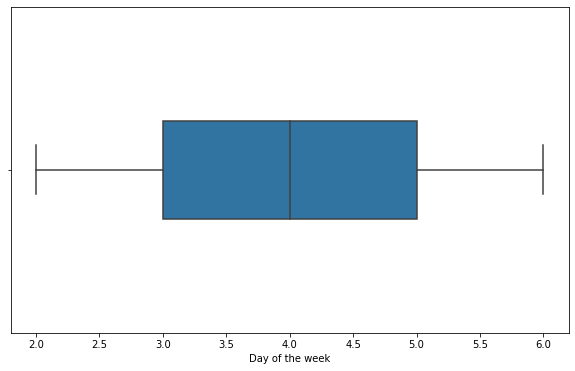

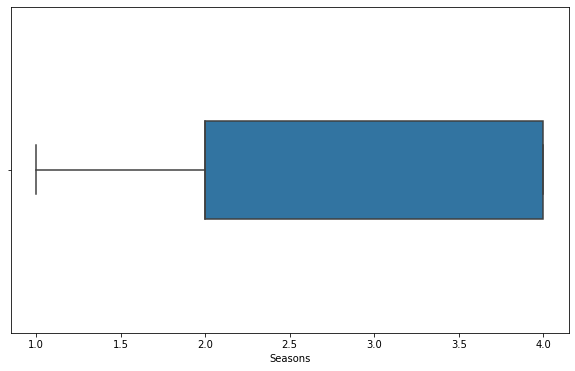

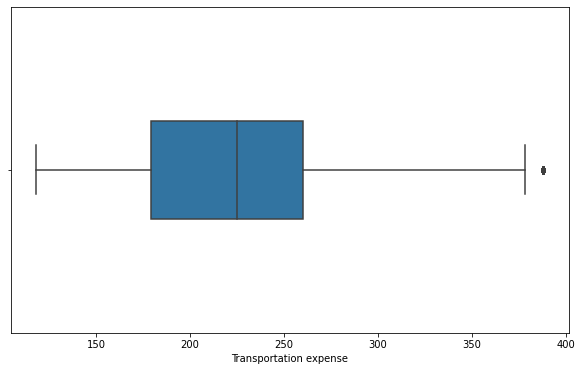

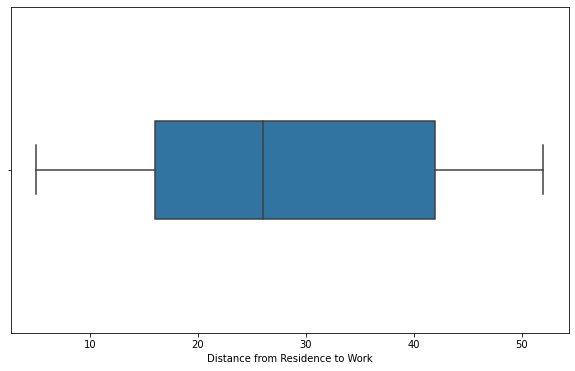

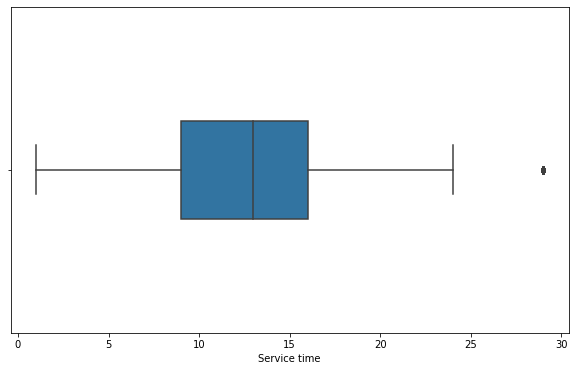

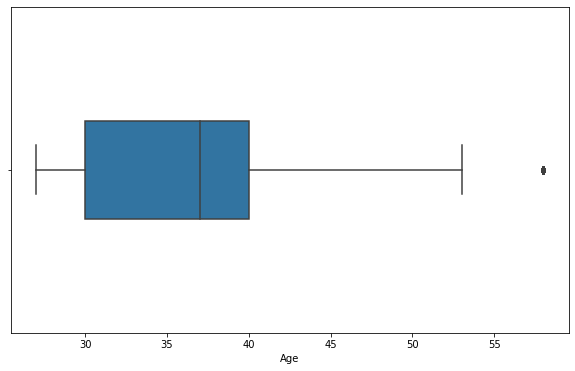

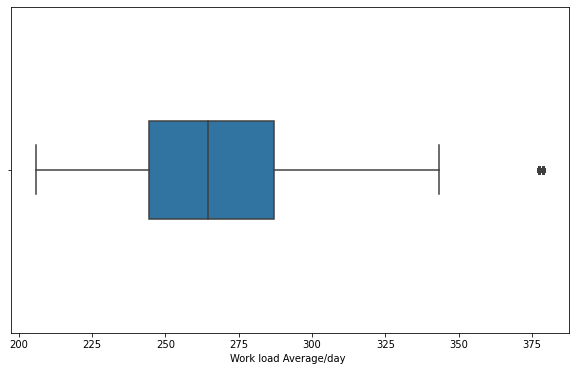

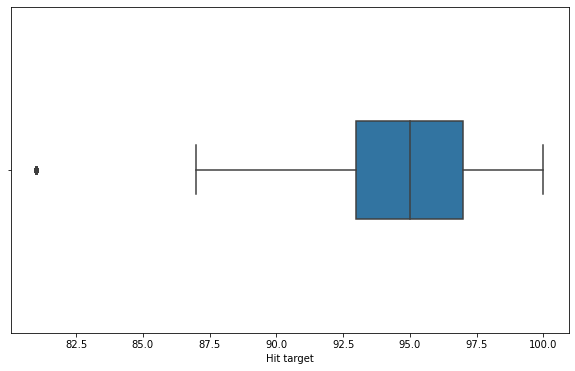

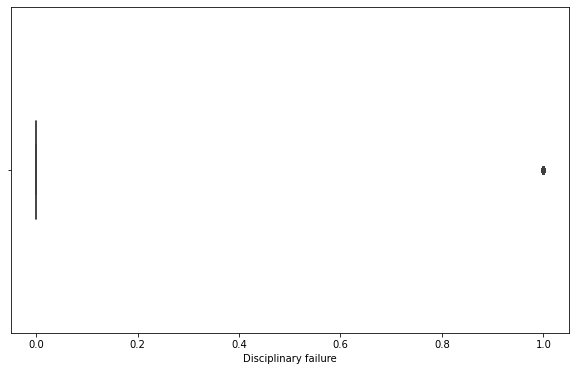

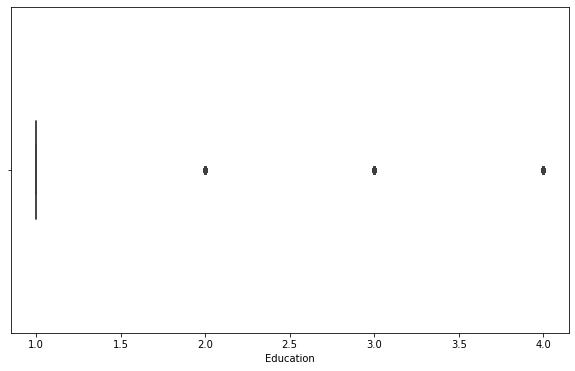

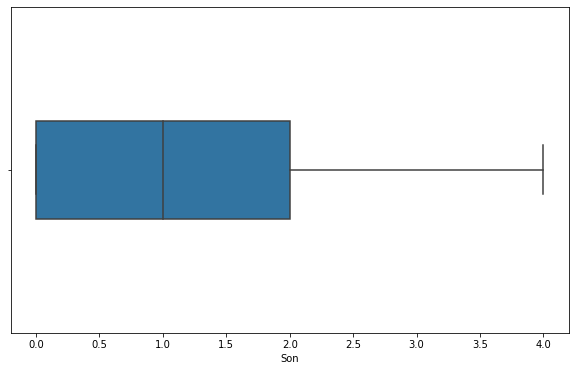

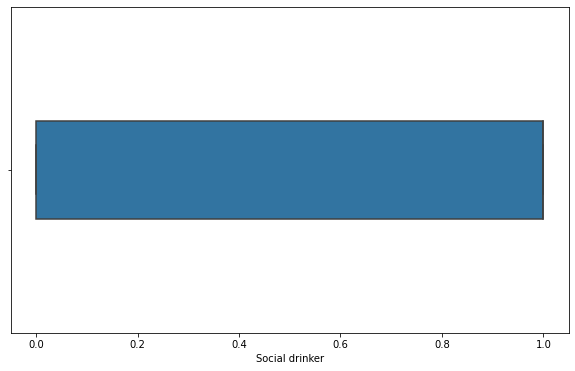

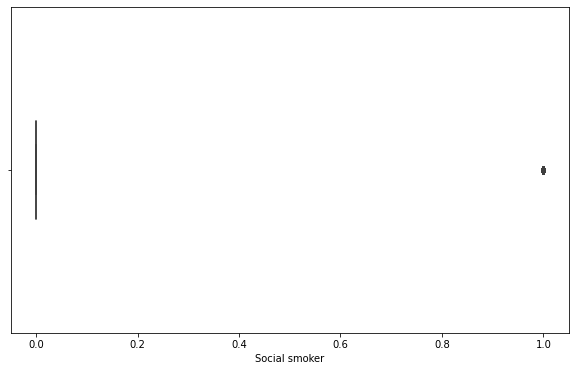

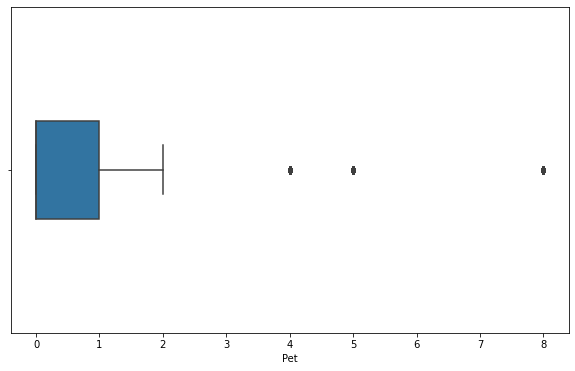

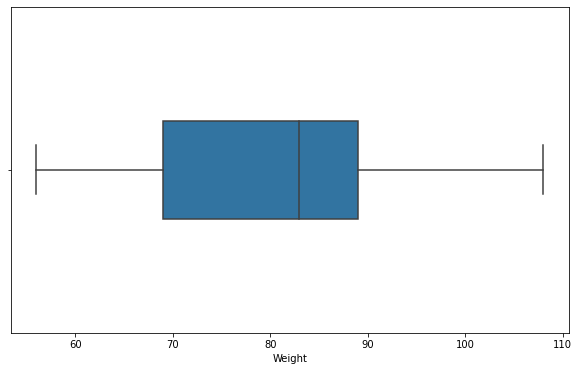

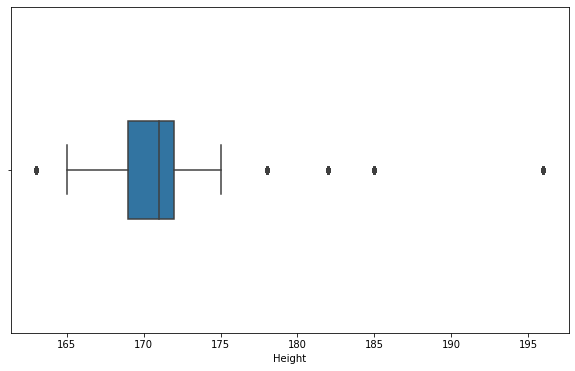

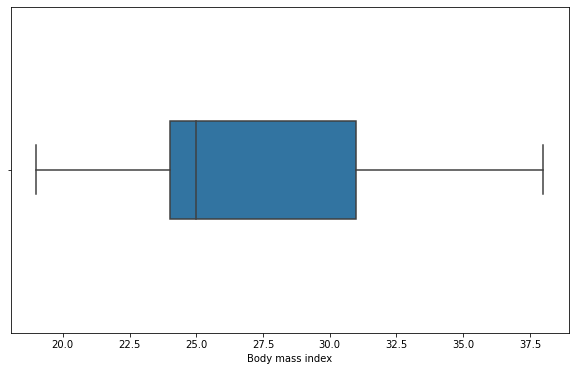

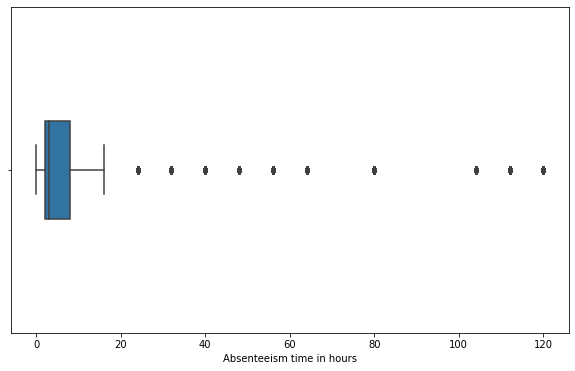

In [25]:
import seaborn as sns
from pyspark.sql.functions import col
from pyspark.sql.types import NumericType, IntegerType
pd_df = df.toPandas()

numerical_cols = [col for col in pd_df.columns if isinstance(df.schema[col].dataType, (NumericType))]

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=pd_df, x=col, width=0.3)
    plt.xlabel(col)
    plt.show()

In [26]:
df.schema.names

['Reason for absence',
 'Month of absence',
 'Day of the week',
 'Seasons',
 'Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Hit target',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet',
 'Weight',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

In [27]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.regression import LinearRegression

# Selecione as colunas independentes
independent_cols = ['Month of absence','Day of the week','Seasons','Transportation expense','Distance from Residence to Work','Service time','Age','Hit target','Disciplinary failure','Education','Son','Social drinker','Social smoker','Pet','Weight','Height','Absenteeism time in hours']

# Crie o objeto VectorAssembler
assembler = VectorAssembler(inputCols=independent_cols, outputCol='features')

# Aplique o assembler no DataFrame
df_assembled = assembler.transform(df)

# Dividir os dados em conjunto de treinamento e teste
train, test = df_assembled.randomSplit([0.7, 0.3])


#Standarizar os dados em train e test

In [28]:
# Criar objeto StandardScaler
scaler = StandardScaler(inputCol='features', outputCol='standard_features')

# Aplique o scaler no conjunto de treinamento
scalerModel = scaler.fit(train)

# Aplique o scaler no conjunto de treinamento
train = scalerModel.transform(train)

# Aplique o scaler no conjunto de teste
test = scalerModel.transform(test)

#Train e teste sem os dados Standarizados

In [29]:
train.show()
test.show()

+--------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+----+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+--------------------+--------------------+
|  Reason for absence|Month of absence|Day of the week|Seasons|Transportation expense|Distance from Residence to Work|Service time| Age|Work load Average/day |Hit target|Disciplinary failure|Education|Son|Social drinker|Social smoker|Pet|Weight|Height|Body mass index|Absenteeism time in hours|            features|   standard_features|
+--------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+----+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+--------------------+-----------

#Train e teste com os dados Standarizados

In [30]:
train.select('standard_features').show(2,truncate=False)
test.select('standard_features').show(2,truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|standard_features                                                                                                                                                                                                                                      |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[3.189651760505258,2.8587299097887655,3.6196971799843607,4.8133827627147445,1.0955003919970188,0.8951163116176222,4.1769397792204686,25.264374968910722,0.0,2.8269190217272007,0.0,0.0,0.0,0.0,6.386352588354532,30.720388802287992,1.6949226185906903]|


In [31]:
# Criar objeto LinearRegression
lr = LinearRegression(labelCol='Body mass index', featuresCol='standard_features')

# Treinar o modelo com os dados de treinamento
model = lr.fit(train)

# Fazer previsões com os dados de teste
predictions = model.transform(test)

#Regressão Linear

In [32]:
# Import the RegressionEvaluator class
from pyspark.ml.evaluation import RegressionEvaluator

# Create an instance of the evaluator
evaluator = RegressionEvaluator(labelCol='Body mass index', predictionCol='prediction', metricName='mse')

# Calculate the MSE on the test data
mse = evaluator.evaluate(predictions)

# Calculate the RMSE on the test data
rmse = mse**0.5
print("Mean Squared Error (MSE): ",mse)
print("Root Mean Squared Error (RMSE): ",rmse)

Mean Squared Error (MSE):  0.11754960925689857
Root Mean Squared Error (RMSE):  0.342855084922039


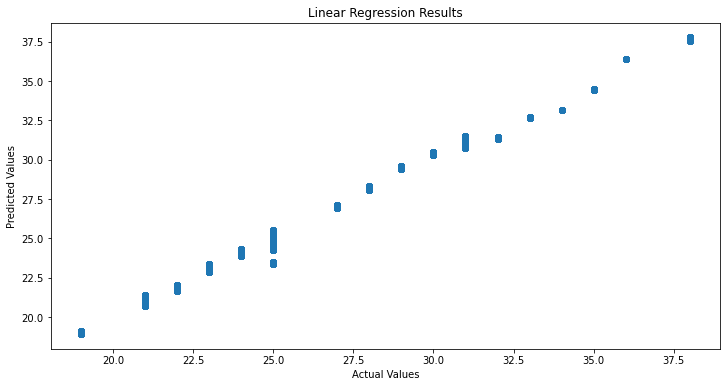

In [33]:
import matplotlib.pyplot as plt

# Extract the actual and predicted values
y_actual = predictions.select('Body mass index').toPandas()
y_pred = predictions.select('prediction').toPandas()

plt.figure(figsize=(12, 6))

# Create the scatter plot
plt.scatter(y_actual, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Results')
plt.show()